# Interpolação trigonométrica: Séries de Fourier, DFT e FFT

 * Até agora usamos polinômios para aproximar e interpolar
 * Outra possibilidade: senos e cossenos
 * Extremamente versátil e poderoso
 * Usado em eqs. diferenciais, análise matemática, funções aleatórias, etc, etc, etc ...

## Polinômio trigonométrico
\begin{align}
S_N(x) = \frac{a_0}{2} +& a_1 \cos\left(\frac{2\pi x}{L_0}\right) + a_2\cos\left(\frac{4\pi x}{L_0}\right) + \cdots + a_N\cos\left(\frac{2\pi n  x}{L_0}\right) + \\ 
&b_1 \sin\left(\frac{2\pi x}{L_0}\right) + b_2\sin\left(\frac{4\pi x}{L_0}\right) + \cdots + b_N\sin\left(\frac{2\pi N  x}{L_0}\right)
\end{align}

Nesta equação, $T_0$ é o período da função.

O que temos é uma base $\phi_n(t)$ com $2N+1$ termos:
\begin{align}
\phi_0(x) &= \frac{1}{2}\\
\phi_n(x) &= \cos\left(\frac{2\pi n x}{L_0}\right) \qquad 0\le n \le N \\
\phi_{n+N}(x) &= \sin\left(\frac{2\pi n x}{L_0}\right) \qquad 1\le n \le N 
\end{align}


## Como calcular os coeficientes $a_i$ e $b_i$??? 
**Ortogonalidade de senos e cossenos**

\begin{align}
\int_{-L_0/2}^{L_0/2} \cos\left(\frac{2\pi n x}{L_0}\right) \cdot \cos\left(\frac{2\pi m x}{L_0}\right) \: dx &= \left\{\begin{matrix}0 \quad n\neq m\\ \frac{L_0}{2} \quad n=m\end{matrix}\right.\\
\int_{-L_0/2}^{L_0/2} \sin\left(\frac{2\pi n x}{L_0}\right) \cdot \sin\left(\frac{2\pi m x}{L_0}\right) \: dx &= \left\{\begin{matrix}0 \quad n\neq m\\ \frac{L_0}{2} \quad n=m\end{matrix}\right.\\
\int_{-L_0/2}^{L_0/2} \cos\left(\frac{2\pi n x}{L_0}\right) \cdot \sin\left(\frac{2\pi m x}{T_0}\right) \: dx &= 0\\
\end{align}



## Como calcular os coeficientes?

\begin{align}
a_n &= \frac{2}{L_0}\int_{-L_0/2}^{L_0/2} y(x) \cdot \cos\left(\frac{2\pi n x}{L_0}\right)\: dx \\
b_m &= \frac{2}{L_0}\int_{-L_0/2}^{L_0} y(x) \cdot \sin\left(\frac{2\pi m x}{L_0}\right)\: dx \\
\end{align}



## Exemplo: $y(x) = |x|, -1 \le x \le 1$ ($L_0 = 2$)
\begin{align}
a_0 &= 2\int_0^1 x\:dx \qquad a_0 = 1\\
a_n &= 2\int_0^1 \cos\left(\frac{2\pi n x}{2}\right)\:dx \qquad a_n = \frac{2}{\pi^2 n^2}\cdot\left[(-1)^n - 1\right] \\
b_n &= 0
\end{align}

## Usando o SymPy

In [1]:
using SymPy
x = symbols("x", real=true)
n = symbols("n", integer=true, positive=true)
a0f  =  2 * integrate(x, (x, 0, 1))
anf = 2 * integrate(x * cos(2PI*n*x/2), (x, 0, 1))

      n        
2⋅(-1)      2  
─────── - ─────
  2  2     2  2
 π ⋅n     π ⋅n 

In [2]:
function abst(t, n)
    x = 1.0/2
    for i in 1:2:n
        ai = 2/(π*i)^2 * ((-1)^i - 1)
        x += ai * cos(π*i*t)
    end
    return x
end

abst (generic function with 1 method)

In [3]:
using PyPlot

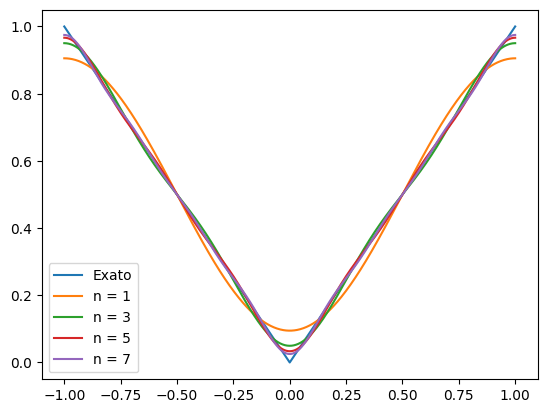

PyObject <matplotlib.legend.Legend object at 0x7f69b5b519d0>

In [4]:
xx = -1:0.002:1; yy = abs.(xx); y1 = abst.(xx, 1); y3 = abst.(xx, 3); y5 = abst.(xx, 5); y7 = abst.(xx, 7);
plot(xx, yy, label="Exato"); plot(xx, y1, label="n = 1"); plot(xx, y3, label="n = 3"); 
plot(xx, y5, label="n = 5"); plot(xx, y7, label="n = 7"); legend()

## Vamos generalizar?

Imagine que queremos aproximar $u(x)$ usando uma base ortogonal $\phi_n(x)$ com $1 \le n \le N$ no domínio $a \le x \le b$:
$$
u(x) \approx u^\delta(x) = \sum_{n=1}^N \hat{u}_n \phi_n(x)
$$
O erro da aproximação vale:
$$
\varepsilon(x) = u^\delta(x) - (x) \quad\longrightarrow\quad \varepsilon^2 = \int_a^b w(x)\left[ u^\delta(x) - u(x) \right]^2\:dx
$$

Nesta equação, $w(x)$ é uma função de peso que agora vamos considerar constante e igual a 1.


## Mínimos quadrados.
$$
\varepsilon^2 = f(\hat{u}_1, \ldots, \hat{u}_N)
$$
Para minimizar o erro, fazemos como fizemos na aula anterior:
$$
\frac{\partial \varepsilon^2}{\partial \hat{u}_k} = 0 \quad 1 \le k \le N
$$

Com isso chegamos ao seguinte sistema de equações lineares:
$$
\sum_{n=1}^N \hat{u}_n \hat{u}_k \int_a^b w(x)\phi_n(x)\phi_k(x)\:dx = \int_a^b w(x)\hat{u}_k u(x)\:dx \qquad 1\le k \le N
$$


## Base ortogonal:

$$
\int_a^b w(x) \phi_n(x) \phi_k(x) \:dx = 
\left\{\begin{matrix} 0 & \quad &  se\: n\ne k \\ \gamma(k) & \quad & se\: n=k\end{matrix}\right.
$$
Quando $\gamma(k) = 1$ para $1\le k \le N$, a base é ortonormal.

Para a função de peso $w(x)=1$ e a base formada com senos e cossenos, recuperamos as equações para $a_n$ e $b_n$ acima.

**Sempre que possível, use bases ortogonais**

Quando não for possível, ainda ajuda usar bases parcialmente ortogonais.

## Mínimos quadrados discreto

Neste caso, com uma base $\phi_n(x)$ com $1\le n \le N$ e com a função $u(x)$ conhecida nos pontos $x_k$, $1 \le k \le Q$, podemos usar o método dos mínimos quadrados:
$$
\varepsilon^2 = \sum_{k=1}^Q w_k\left[u^\delta(x_k) - u(x_k)\right]^2 = \sum_{k=1}^Q w_k\left[\left(\sum_{n=1}^N \hat{u}_n \phi_n(x)\right) - u_k\right]^2
$$
Chegamos ao sistema apresentado na aula anterior:
$$
\left(
\begin{matrix}
\sum_{k=1}^Q w_k\phi_1(x_k)\cdot\phi_1(x_k) & 
\cdots &
\sum_{k=1}^Q w_k\phi_1(x_k)\cdot\phi_N(x_k) \\
\sum_{k=1}^Q w_k\phi_2(x_k)\cdot\phi_1(x_k) & 
\cdots &
\sum_{k=1}^Q w_k\phi_2(x_k)\cdot\phi_N(x_k) \\
\vdots & \ddots & \vdots \\
\sum_{k=1}^Q w_k\phi_N(x_k)\cdot\phi_1(x_k) & 
\cdots &
\sum_{k=1}^Q w_k\phi_N(x_k)\cdot\phi_N(x_k) \\
\end{matrix}\right)
\cdot
\left(\begin{matrix} \hat{u}_1 \\ \hat{u}_2 \\ \vdots \\ \hat{u}_N \end{matrix}\right)
= 
\left(\begin{matrix} \sum_{k=1}^Q w_k u_k \phi_1(x_k) \\ \sum_{k=1}^Q w_k u_k \phi_2(x_k) \\  \vdots \\ \sum_{k=1}^Q w_k u_k \phi_N(x_k)\end{matrix}\right)
$$

Aqui introduzimos a possibilidade de haver um peso $w_k$ para cada ponto.

## Voltando para os polinômios trigonométricos...

### Ortogonalidade discreta
Já vimos que a base dos polinômios trigonométricos é ortogonal, de modo que para $k\ne n$, 
$$
\int_{-L_0/2}^{L_0/2} \phi_n(x) \cdot \phi_k(x) \: dx = 0
$$
Mas podemos aproximar esta integral, chamando $\Delta x = L_0 / Q$
$$
\int_{-L_0/2}^{L_0/2} \phi_n(x) \cdot \phi_k(x) \: dx \approx \Delta x\cdot \sum_{i=0}^Q \phi_n(x_i)\cdot \phi_k(x_i)  \approx 0 \qquad x_i = -\frac{L_0}{2} + i\cdot\Delta x\quad i = 0, \ldots, Q-1
$$


## Ortogonalidade discreta
Admitindo que temos $Q$ pontos $x_j = j\cdot \Delta x$ para $0\le j\le Q$ e $\Delta x = L_0/Q$, demonstra-se que

$$
\sum_{j=0}^{Q-1} \cos\left(\frac{2\pi n x_j}{L_0}\right) = 0 \qquad
\sum_{j=0}^{Q-1} \sin\left(\frac{2\pi n x_j}{L_0}\right) = 0
$$
quando $n$ é multiplo de $Q$. Por outro lado

$$
\sum_{j=0}^{Q-1} \left[\cos\left(\frac{2\pi n x_j}{L_0}\right)\right]^2 = \frac{Q}{2} \qquad
\sum_{j=0}^{Q-1} \left[\sin\left(\frac{2\pi n x_j}{L_0}\right)\right]^2 = \frac{Q}{2}
$$
quando $n$ não é múltiplo de $Q/2$



# Ortogonalidade discreta
Lembrando que 
\begin{align}
    2\cos\theta\cos\phi &= \cos(\theta-\phi) + \cos(\theta+\phi)\\
    2\cos\theta\sin\phi &= \sin(\theta+\phi) - \sin(\theta-\phi)\\
\end{align}

Chega-se à relação de ortogonalidade desejada:
$$
\sum_{i=0}^Q \phi_n(x_i)\cdot \phi_k(x_i)=0 \qquad k\ne n, N\: \text{não é múltiplo de}\: Q/2
$$

## Transformada de Fourier real discreta

Com as relações de ortogonalidade, chega-se à seguinte relação para os coeficientes $a_n$ e $b_n$:

\begin{align}
a_n &= \frac{2}{Q}\cdot\sum_{j=0}^{Q-1} y_j\cos\left(\frac{2\pi n x_j}{L_0}\right) \qquad n=0, 1, \ldots, N\\
b_n &= \frac{2}{Q}\cdot\sum_{j=0}^{Q-1} y_j\sin\left(\frac{2\pi n x_j}{L_0}\right) \qquad n=1, \ldots, N
\end{align}


## Outra abordagem para a transformada de Fourier real discreta
\begin{align}
a_n &= \frac{2}{L_0}\int_{-L_0/2}^{L_0/2} y(x) \cdot \cos\left(\frac{2\pi n x}{L_0}\right)\: dx \\
b_m &= \frac{2}{L_0}\int_{-L_0/2}^{L_0} y(x) \cdot \sin\left(\frac{2\pi m x}{L_0}\right)\: dx \\
\end{align}

Aproximando as integrais:
\begin{align}
a_n &= \frac{2}{L_0}\int_{-L_0/2}^{L_0/2} y(x) \cdot \cos\left(\frac{2\pi n x}{L_0}\right)\: dx \approx \frac{2}{Q\cdot \Delta x} \sum_{j=0}^{Q-1} y(x_j) \cos\left(\frac{2\pi n x_j}{L_0}\right) \cdot \Delta x =\\
 & =  \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \cos\left(\frac{2\pi n x_j}{L_0}\right)
\end{align}

Onde $\Delta x = L_0 / Q$

E assim obtemos o mesmo resultado que no slide anterior!

## Exemplo: $y(x) = |x|, -1 \le x \le 1$ ($L_0 = 2$)


In [5]:
function fourierseries(x, L0, a0, a, b)
    y = a0/2
    N = length(a)
    for i = 1:N
        y += a[i] * cos(2π*i*x/L0)
        y += b[i] * sin(2π*i*x/L0)
    end
    return y
end


fourierseries (generic function with 1 method)

In [6]:
L0 = 2.0
Q = 20
N = 8

x = range(-1.0, 1.0, length=Q+1)[1:Q]
y = abs.(x)

a0 = 2/Q * sum(y)
a = 2/Q * [sum(y .* cos.(2π .* n .* x ./ L0)) for n = 1:N]
b = 2/Q * [sum(y .* sin.(2π .* n .* x ./ L0)) for n = 1:N];

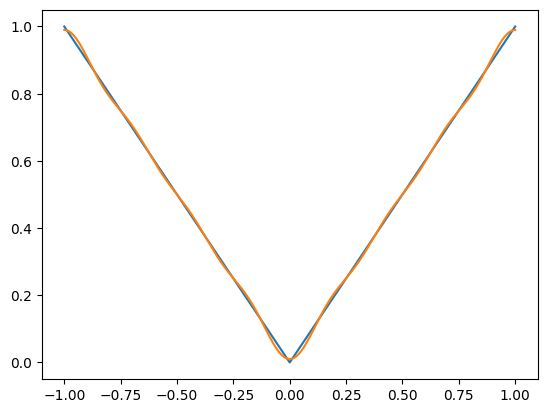

In [8]:
# y(x) = |x|, -1 \le x \le 1$ ($L_0 = 2$)
xx = -1:0.005:1
yy = abs.(xx)
yy1 = fourierseries.(xx, L0, a0, Ref(a), Ref(b))
plot(xx, yy)
plot(xx, yy1);

## Problemas digitais:

O que nós temos: 
$$
y_j, \Delta x, \quad\longrightarrow\quad x_{j+1}-x_j = \Delta x =\frac{L_0}{Q} \qquad 0\le j < Q
$$
não temos os valores de $x_n$ exatos. Então podemos assumir $x_j = j \Delta x$:
\begin{align}
 a_n &= \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \cos\left(\frac{2\pi n x_j}{L_0}\right) = 
 \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \cos\left(\frac{2\pi n j \Delta x}{Q\cdot\Delta x}\right) = 
 \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \cos\left(\frac{2\pi n j}{Q}\right) \\
 b_n &= \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \sin\left(\frac{2\pi n x_j}{L_0}\right) = 
 \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \sin\left(\frac{2\pi n j}{Q}\right) 
\end{align}


# Forma complexa da série de Fourier

$$
c_n = \left\{ \begin{matrix}
\frac{a_0}{2} & n = 0 \\
\frac{1}{2}\left(a_n - i b_n\right) & n > 0\\
\frac{1}{2}\left(a_n + i b_n\right) & n < 0
\end{matrix}\right.
$$
$$
f(x) = \sum_{n=-N}^N c_n \exp\left(\frac{2\pi i n x}{L_0} \right) \qquad 
c_n = \frac{1}{L_0}\int_0^{L_0} f(x) \exp\left(-\frac{2\pi i n x}{L_0} \right)\:dx
$$
Se $f(x)$ for uma função real, para $n$ positivo:
$$
\begin{matrix}
c_n + c_{-n} = a_n\\
c_n - c_{-n} = -i b_n
\end{matrix}
\longrightarrow
c_n = c^*_{-n}
$$

## DFT - Transformada de Fourier discreta

$$
c_n = \frac{1}{L_0}\int_0^{L_0} f(x) \exp\left(-\frac{2\pi i\cdot n x}{L_0} \right)\:dx \approx \frac{1}{\Delta x \cdot Q}\sum_{j=0}^{Q-1} y_j \exp\left(-\frac{2\pi i \cdot n j\Delta x}{Q\cdot \Delta x} \right)\cdot\Delta x
$$

Portanto, 
$$
c_n = \frac{1}{Q}\sum_{j=0}^{Q-1} y_j \exp\left(-\frac{2\pi i\cdot n j}{Q} \right)
$$


# DFT - Discrete Fourier Transform

$$
c_n = X_n = \frac{1}{N}\sum_{k=0}^{N-1} x_k \exp\left(-\frac{2\pi n k}{N} \right)
$$

Repare que isto pode ser escrito como uma multiplicação de matrizes:
$$
\left(\begin{matrix} X_0 \\ \vdots \\ X_{N-1}\end{matrix} \right)
= 
\left(\begin{matrix} 1 & \cdots & \exp\left(-\frac{2\pi (N-1)}{N}\right)\\
\vdots & \ddots &\vdots \\
\exp\left(-\frac{2\pi (N-1)}{N}\right) & \cdots & \exp\left(-\frac{2\pi (N-1)(N-1)}{N}\right)\\
\end{matrix}\right) 
\cdot 
\left(\begin{matrix} x_0 \\ \vdots \\ x_{N-1}\end{matrix} \right) 
$$




## FFT - Transformada Rápida de Fourier


Um algorítmo rápido para
$$
\sum_{j=0}^{Q-1} y_j \exp\left(-\frac{2\pi i\cdot n j}{Q} \right)
$$

Se $0\le n\le Q$, o custo computacional é $\mathcal{O}(Q^2)$.

FFT: custo cai para $\mathcal{O}(Q\cdot\log Q)$

Originalmente, só funcionava com $Q$ igual a potências de 2.


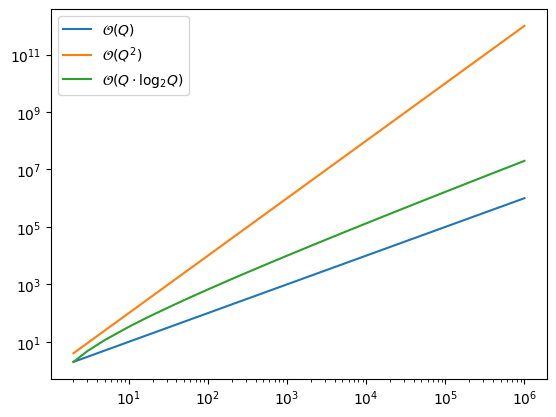

PyObject <matplotlib.legend.Legend object at 0x7f69a93656a0>

In [23]:
Q = [2, 3, 5, 10, 15, 20, 40, 60, 80, 100, 150, 200, 300, 500, 700, 1000, 2000, 5000, 10000,
20000, 30000, 50000, 100000, 200000, 500000, 1000000]
t1 = Q
t2 = Q.^2
tlog = Q .* log2.(Q);
loglog(Q, t1, label="\$\\mathcal{O}(Q)\$")
plot(Q, t2, label="\$\\mathcal{O}(Q^2)\$")
plot(Q, tlog, label="\$\\mathcal{O}(Q\\cdot\\log_2 Q)\$")
legend()


## FFTW - Fastest Fourier Transform of the West

In [65]:
## Pkg.add("FFTW")
using FFTW

In [69]:
L₀ = 1.0; Q = 4; freq=1
x = range(0.0, L₀, length=Q+1)[1:Q]
y = sin.(freq.*2π.*x); f = (0:Q-1) / L₀
Y = 1/Q * fft(y)

4-element Array{Complex{Float64},1}:
  3.061616997868383e-17 + 0.0im
 -3.061616997868383e-17 - 0.5im
  3.061616997868383e-17 + 0.0im
 -3.061616997868383e-17 + 0.5im

## Exemplos

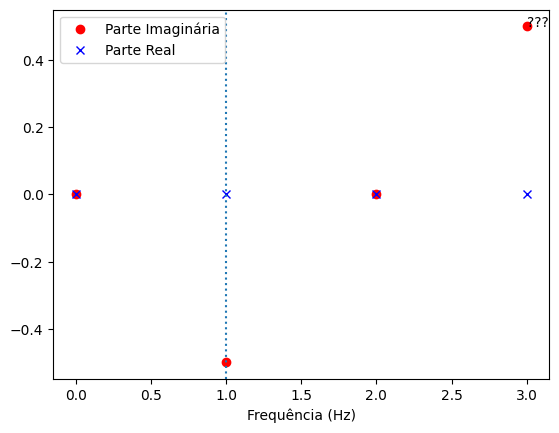

PyObject <matplotlib.legend.Legend object at 0x7f6999d93a30>

In [70]:
L₀ = 1.0; Q = 4; freq=1
x = range(0.0, L₀, length=Q+1)[1:Q]
y = sin.(freq.*2π.*x); f = (0:Q-1) / L₀
Y = 1/Q * fft(y)
plot(f, imag.(Y), "ro", label="Parte Imaginária")
plot(f, real.(Y), "bx", label="Parte Real")
xlabel("Frequência (Hz)"); axvline(freq, linestyle=":")
annotate("???", (f[Q], imag(Y[Q])))
legend()

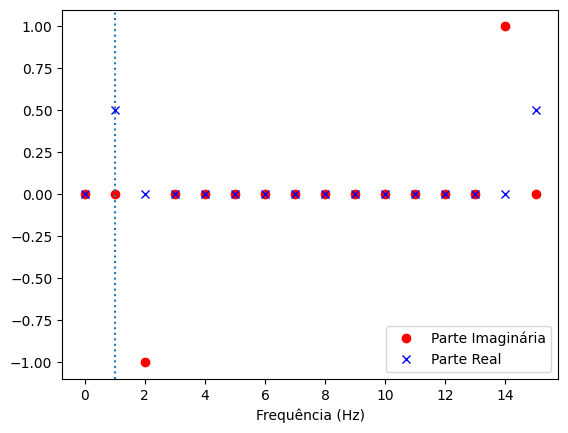

PyObject <matplotlib.legend.Legend object at 0x7f699953b340>

In [76]:
L₀ = 1.0; Q = 16; freq=1
x = range(0.0, L₀, length=Q+1)[1:Q]; f = (0:Q-1) / L₀

y = cos.(freq.*2π.*x) + 2*sin.(2*freq.*2π.*x)

Y = 1/Q * fft(y)
plot(f, imag.(Y), "ro", label="Parte Imaginária")
plot(f, real.(Y), "bx", label="Parte Real")
xlabel("Frequência (Hz)"); axvline(freq, linestyle=":")
legend()

## A DFT é periódica (aliasing)!

Sejam os pontos $y_j$, $0 \le j < N$:

$$
Y_k = \frac{1}{N}\sum_{j=0}^{N-1} y_j\exp\left(-\frac{2\pi i j k}{N}\right)
$$
$$
Y_{N+k} = \frac{1}{N}\sum_{j=0}^{N-1} y_j\exp\left[-\frac{2\pi i j (k+N)}{N}\right] = 
\frac{1}{N}\sum_{j=0}^{N-1} y_je^{-2\pi i j}\exp\left(-\frac{2\pi i j k}{N}\right)
$$
$$
Y_{N+k} = \frac{1}{N}\sum_{j=0}^{N-1} y_j\exp\left(-\frac{2\pi i j k}{N}\right) = Y_k
$$


## Exemplo de Aliasing

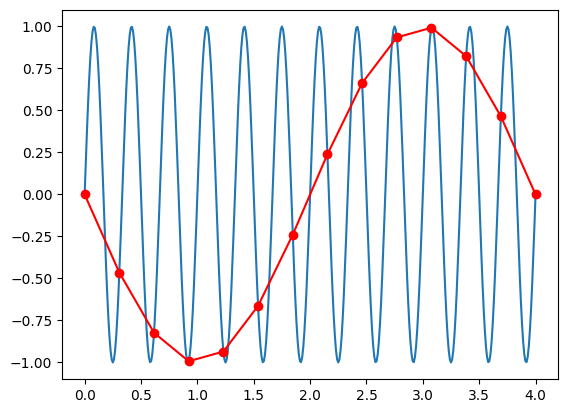

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f699867fca0>

In [116]:
ncyc = 4; Q = 13; T₀ = 1; g(t) = sin(6π * t)
t = range(0, ncyc, length=Q+1); x = g.(t)
t0 = 0:0.01:ncyc; x0 = g.(t0)
plot(t0, x0); plot(t, x, "ro-")



## O que acontece com frequências negativas (quando $y_j$ é real)?

E se o $y_j$ forem reais?
$$
Y_{-k} = \frac{1}{N}\sum_{j=0}^{N-1} y_j\exp\left(\frac{2\pi i j k}{N}\right) = Y^*_k
$$

Mas lembre-se que $Y$ também é periódico:

$$
Y_{-k} = Y_{N-k} = Y^*_l
$$

In [135]:
L₀ = 1.0; Q = 5; freq=1
x = range(0.0, L₀, length=Q+1)[1:Q]
y = sin.(freq.*2π.*x); f = (0:Q-1) / L₀
Y =  fft(y)
y1 = ifft(Y)
real.(y1) - y

5-element Array{Float64,1}:
  0.0
  0.0
  0.0
 -1.1102230246251565e-16
  1.1102230246251565e-16

## Transformada reais

In [130]:
println(length(y))
Y1 = rfft(y)

5


3-element Array{Complex{Float64},1}:
 1.1102230246251565e-16 + 0.0im
 -2.139456371091744e-16 - 2.5im
 1.5843448587791657e-16 + 0.0im

In [142]:
FFTW.irfft(Y1)

MethodError: MethodError: no method matching irfft(::Array{Complex{Float64},1})
Closest candidates are:
  irfft(::AbstractArray, !Matched::Integer) at /home/pjabardo/.julia/packages/AbstractFFTs/mhQvY/src/definitions.jl:283
  irfft(::AbstractArray, !Matched::Integer, !Matched::Any) at /home/pjabardo/.julia/packages/AbstractFFTs/mhQvY/src/definitions.jl:284
  irfft(!Matched::AbstractArray{#s28,N} where N where #s28<:Real, !Matched::Integer) at /home/pjabardo/.julia/packages/AbstractFFTs/mhQvY/src/definitions.jl:291
  ...

In [144]:
?FFTW.irfft

```
irfft(A, d [, dims])
```

Inverse of [`rfft`](@ref): for a complex array `A`, gives the corresponding real array whose FFT yields `A` in the first half. As for [`rfft`](@ref), `dims` is an optional subset of dimensions to transform, defaulting to `1:ndims(A)`.

`d` is the length of the transformed real array along the `dims[1]` dimension, which must satisfy `div(d,2)+1 == size(A,dims[1])`. (This parameter cannot be inferred from `size(A)` since both `2*size(A,dims[1])-2` as well as `2*size(A,dims[1])-1` are valid sizes for the transformed real array.)


Perguntas importantes
 
 * Será que esta série converge para a função original?
 * Em que condições esta série converge?
 * Quão rápido se dá esta convergência?
 * O que acontece quando $N\longrightarrow\infty$?
 
Respostas genéricas
 * A série converge para condições bem amplas, inclusive se houver discontinuidades na função.
 * Esta convergência se dá para $N\longrightarrow\infty$. Para valor de $N$ finito, as coisas são mais complicadas (como veremos adiante).
 * Para funções periódicas e suaves, não existe aproximação melhor!!!

In [ ]:
using FFTW
using PyPlot
function dftmatrix(n)
    A = zeros(ComplexF64, n, n)
    for i = 0:(n-1)
        for k = 0:(n-1)
            A[k+1,i+1] = exp(-2π*im*i*k/n) / n
        end
    end
    return A
end

In [ ]:
n = 8
T₀ = 1.0
Δt = T₀/n
t = (0:n-1) * Δt
x = sin.(2π .* t / T₀)
D = dftmatrix(n)
X = D * x

In [ ]:
plot(imag.(X))


## Transformada inversa

In [ ]:
t[7]